In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import collections
import matplotlib
from matplotlib import pyplot as plt  

In [123]:
missing_value = ["?", " ?"]
data =pd.read_csv('adult.csv', na_values = missing_value)
print(data.head(5))

   AGE          WORKCLASS  FNLWGT   EDUCATION  EDUCATIONYEARS  \
0   39          State-gov   77516   Bachelors              13   
1   50   Self-emp-not-inc   83311   Bachelors              13   
2   38            Private  215646     HS-grad               9   
3   53            Private  234721        11th               7   
4   28            Private  338409   Bachelors              13   

         MARITALSTATUS          OCCUPATION    RELATIONSHIP    RACE      SEX  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   CAPITALGAIN  CAPITALLOSS  HRSPERWEEK   NATIVECOUNTRY   CLASS  
0         2174            0          40   United-States   <=50K  
1 

In [124]:
print(data['NATIVECOUNTRY'].value_counts()/data.shape[0])
data.loc[data['NATIVECOUNTRY']!='United-States', 'NATIVECOUNTRY']='Other'

 United-States                 0.895857
 Mexico                        0.019748
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136
 Nicaragua                     0.001044


In [125]:
#X=data.drop(['FNLWGT','CAPITALGAIN','CAPITALLOSS','CLASS'], axis=1)#

data['WORKCLASS'] = pd.Categorical(data['WORKCLASS']).codes
data['EDUCATION'] = pd.Categorical(data['EDUCATION']).codes
data['MARITALSTATUS'] = pd.Categorical(data['MARITALSTATUS']).codes
data['OCCUPATION'] = pd.Categorical(data['OCCUPATION']).codes
data['RELATIONSHIP'] = pd.Categorical(data['RELATIONSHIP']).codes
data['RACE'] = pd.Categorical(data['RACE']).codes
data['SEX'] = pd.Categorical(data['SEX']).codes
data['NATIVECOUNTRY'] = pd.Categorical(data['NATIVECOUNTRY']).codes
X=data.drop(['FNLWGT','CAPITALGAIN','CAPITALLOSS','CLASS'], axis=1)#
Y = pd.Categorical(data['CLASS']).codes
print(X)
print(Y)

       AGE  WORKCLASS  EDUCATION  EDUCATIONYEARS  MARITALSTATUS  OCCUPATION  \
0       39          6          9              13              4           0   
1       50          5          9              13              2           3   
2       38          3         11               9              0           5   
3       53          3          1               7              2           5   
4       28          3          9              13              2           9   
...    ...        ...        ...             ...            ...         ...   
32556   27          3          7              12              2          12   
32557   40          3         11               9              2           6   
32558   58          3         11               9              6           0   
32559   22          3         11               9              4           0   
32560   52          4         11               9              2           3   

       RELATIONSHIP  RACE  SEX  HRSPERWEEK  NATIVEC

In [126]:
train_X, test_X, train_Y, test_Y = train_test_split(X.values, Y, test_size = 0.2)

In [127]:
import time
model = DecisionTreeClassifier(min_samples_split=10)
start = time.time()
#model.fit(X, y)
model.fit(train_X, train_Y)
stop = time.time()
print(f"Training time: {stop - start}s")


Training time: 0.06824874877929688s


In [128]:
predictions = model.predict(train_X)
print((predictions==train_Y).mean())

0.9084766584766585


In [129]:
predictions = model.predict(test_X)
print((predictions==test_Y).mean())
#print "predict time:", round(time()-t1, 3), "s"

0.8014739751266697


In [130]:
missing_value = ["?", " ?"]
datatest =pd.read_csv('adult.test.csv', na_values = missing_value)
print(datatest.head(5))


   AGE   WORKCLASS  FNLWGT      EDUCATION  EDUCATIONYEARS  \
0   25     Private  226802           11th               7   
1   38     Private   89814        HS-grad               9   
2   28   Local-gov  336951     Assoc-acdm              12   
3   44     Private  160323   Some-college              10   
4   18         NaN  103497   Some-college              10   

         MARITALSTATUS          OCCUPATION RELATIONSHIP    RACE      SEX  \
0        Never-married   Machine-op-inspct    Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing      Husband   White     Male   
2   Married-civ-spouse     Protective-serv      Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct      Husband   Black     Male   
4        Never-married                 NaN    Own-child   White   Female   

   CAPITALGAIN  CAPITALLOSS  HRSPERWEEK   NATIVECOUNTRY    CLASS  
0            0            0          40   United-States   <=50K.  
1            0            0          50   

In [131]:
print(datatest['NATIVECOUNTRY'].value_counts()/data.shape[0])
datatest.loc[data['NATIVECOUNTRY']!='United-States', 'NATIVECOUNTRY']='Other'

 United-States                 0.450293
 Mexico                        0.009459
 Philippines                   0.002979
 Puerto-Rico                   0.002150
 Germany                       0.002119
 Canada                        0.001873
 India                         0.001566
 El-Salvador                   0.001505
 China                         0.001443
 Cuba                          0.001321
 England                       0.001136
 South                         0.001075
 Dominican-Republic            0.001013
 Italy                         0.000983
 Haiti                         0.000952
 Portugal                      0.000921
 Japan                         0.000921
 Poland                        0.000829
 Columbia                      0.000799
 Jamaica                       0.000768
 Guatemala                     0.000737
 Greece                        0.000614
 Vietnam                       0.000584
 Ecuador                       0.000522
 Iran                          0.000491


C:\Users\Roopika Ganesh\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [132]:
#X=data.drop(['FNLWGT','CAPITALGAIN','CAPITALLOSS','CLASS'], axis=1)#
datatest['WORKCLASS'] = pd.Categorical(datatest['WORKCLASS']).codes
datatest['EDUCATION'] = pd.Categorical(datatest['EDUCATION']).codes
datatest['MARITALSTATUS'] = pd.Categorical(datatest['MARITALSTATUS']).codes
datatest['OCCUPATION'] = pd.Categorical(datatest['OCCUPATION']).codes
datatest['RELATIONSHIP'] = pd.Categorical(datatest['RELATIONSHIP']).codes
datatest['RACE'] = pd.Categorical(datatest['RACE']).codes
datatest['SEX'] = pd.Categorical(datatest['SEX']).codes
datatest['NATIVECOUNTRY'] = pd.Categorical(datatest['NATIVECOUNTRY']).codes
X1=datatest.drop(['FNLWGT','CAPITALGAIN','CAPITALLOSS','CLASS'], axis=1)#
Y1= pd.Categorical(datatest['CLASS']).codes
print(X1)
print(Y1)

       AGE  WORKCLASS  EDUCATION  EDUCATIONYEARS  MARITALSTATUS  OCCUPATION  \
0       25          3          1               7              4           6   
1       38          3         11               9              2           4   
2       28          1          7              12              2          10   
3       44          3         15              10              2           6   
4       18         -1         15              10              4          -1   
...    ...        ...        ...             ...            ...         ...   
16276   39          3          9              13              0           9   
16277   64         -1         11               9              6          -1   
16278   38          3          9              13              2           9   
16279   44          3          9              13              0           0   
16280   35          4          9              13              2           3   

       RELATIONSHIP  RACE  SEX  HRSPERWEEK  NATIVEC

In [133]:
import time
start = time.time()
predictionstest = model.predict(X1)
stop = time.time()
print(f"prediction time: {stop - start}s")
print((predictionstest==Y1).mean())

prediction time: 0.011484146118164062s
0.8010564461642405


In [134]:
from sklearn.metrics import classification_report
print(classification_report(Y1, predictionstest))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     12435
           1       0.59      0.51      0.55      3846

    accuracy                           0.80     16281
   macro avg       0.72      0.70      0.71     16281
weighted avg       0.79      0.80      0.80     16281



0.7884845816028057


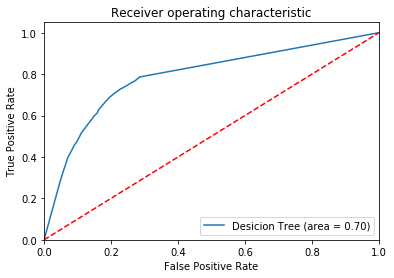

In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
logit_roc_auc = roc_auc_score(Y1, model.predict(X1))
fpr, tpr, thresholds = roc_curve(Y1, model.predict_proba(X1)[:,1])
auc = metrics.auc(fpr, tpr)
print(auc)
plt.figure()
plt.plot(fpr, tpr, label='Desicion Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('desicion_ROC')
plt.show()

In [105]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import multilabel_confusion_matrix
#confusion_matrix = multilabel_confusion_matrix(Y1, predictionstest,labels=[0,1])
confusion_matrix = confusion_matrix(Y1, predictionstest)
#confusion_matrix1 = multilabel_confusion_matrix(Y1, predictionstest,labels=[1])
print(confusion_matrix)
#print(confusion_matrix1)

[[11009  1426]
 [ 1852  1994]]


In [106]:
tp = confusion_matrix[0,1]
tn = confusion_matrix[0,0]
fp = confusion_matrix[1,0]
fn = confusion_matrix[1,1]
tptn = tp+tn
allsco = tp+tn+fp+fn
ac = tptn/allsco
print(ac)
#precision
pr = tp/(tp+fp)
print(pr)
#recall
re = tp/(tp+fn)
print(re)
#fmeasure 
fm = (2 * pr * re)/(pr + re)
print(fm)

0.7637737239727289
0.43502135448444174
0.41695906432748536
0.4257987458942968
